# **Loading important libraries and the dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

In [2]:
dset = pd.read_csv('/content/train_dataset.csv')
dset.head()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
0,14,0,0.000001,10,1,0,0,1,0,0,0,0,1,0,0,0,3
1,18,20,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0,1
2,17,14,0.000001,300,0,1,0,1,0,0,0,0,0,0,0,1,1
3,3,17,0.010000,100,0,1,0,1,0,0,0,0,0,0,0,1,1
4,9,4,0.010000,50,1,0,0,1,0,0,0,0,0,1,0,0,2


# **Exploratory Data Analysis**

In [3]:
dset.shape

(31583, 17)

In [4]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31583 entries, 0 to 31582
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   LTE/5g Category       31583 non-null  int64  
 1   Time                  31583 non-null  int64  
 2   Packet Loss Rate      31583 non-null  float64
 3   Packet delay          31583 non-null  int64  
 4   IoT                   31583 non-null  int64  
 5   LTE/5G                31583 non-null  int64  
 6   GBR                   31583 non-null  int64  
 7   Non-GBR               31583 non-null  int64  
 8   AR/VR/Gaming          31583 non-null  int64  
 9   Healthcare            31583 non-null  int64  
 10  Industry 4.0          31583 non-null  int64  
 11  IoT Devices           31583 non-null  int64  
 12  Public Safety         31583 non-null  int64  
 13  Smart City & Home     31583 non-null  int64  
 14  Smart Transportation  31583 non-null  int64  
 15  Smartphone         

In [5]:
dset.describe()

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone,slice Type
count,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000,31583.000000
mean,10.974923,11.476459,0.003079,114.126745,0.468100,0.531900,0.441187,0.558813,0.106291,0.057943,0.116107,0.057879,0.059716,0.117722,0.058734,0.425609,1.702150
std,6.053641,6.915643,0.004344,106.320976,0.498989,0.498989,0.496537,0.496537,0.308215,0.233639,0.320358,0.233519,0.236963,0.322283,0.235130,0.494443,0.822956
min,1.000000,0.000000,0.000001,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.000000,6.000000,0.000001,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,11.000000,11.000000,0.001000,75.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,16.000000,17.000000,0.010000,150.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,22.000000,23.000000,0.010000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [9]:
dset.isnull().sum()

LTE/5g Category         0
Time                    0
Packet Loss Rate        0
Packet delay            0
IoT                     0
LTE/5G                  0
GBR                     0
Non-GBR                 0
AR/VR/Gaming            0
Healthcare              0
Industry 4.0            0
IoT Devices             0
Public Safety           0
Smart City & Home       0
Smart Transportation    0
Smartphone              0
slice Type              0
dtype: int64

In [10]:
dset['slice Type'].unique()

array([3, 1, 2])

In [21]:
dset.corrwith(dset['slice Type'])

LTE/5g Category         0.076893
Time                    0.001263
Packet Loss Rate       -0.097135
Packet delay           -0.396959
IoT                     0.909506
LTE/5G                 -0.909506
GBR                    -0.331008
Non-GBR                 0.331008
AR/VR/Gaming           -0.294246
Healthcare              0.391124
Industry 4.0            0.349881
IoT Devices             0.089709
Public Safety           0.397438
Smart City & Home       0.132207
Smart Transportation    0.393952
Smartphone             -0.734449
slice Type              1.000000
dtype: float64

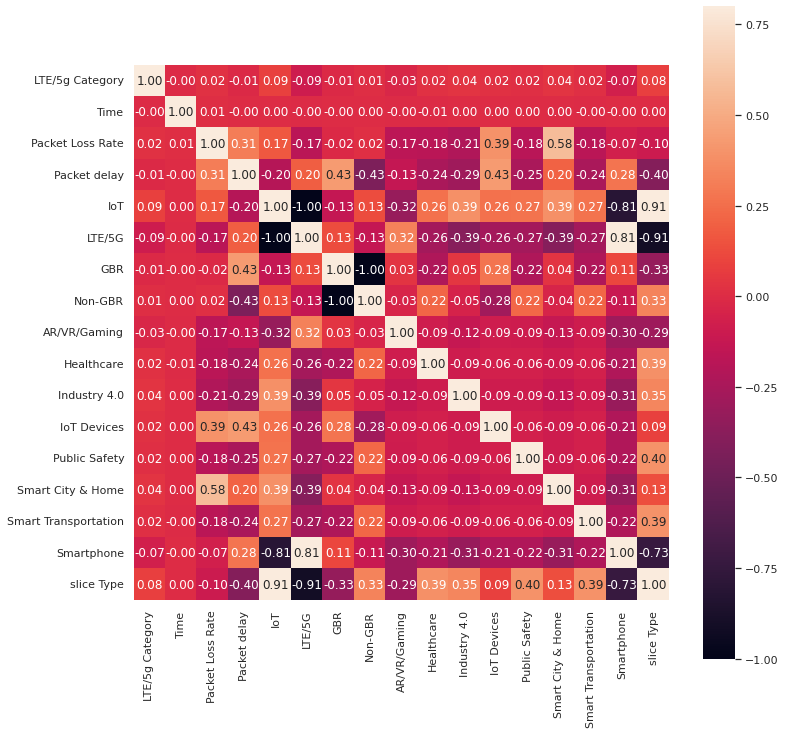

In [19]:
corrmat = dset.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()

In [14]:
skew(dset['LTE/5g Category'])

0.02419255531792126

In [15]:
kurtosis(dset['LTE/5g Category'])

-1.1616092550147963

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


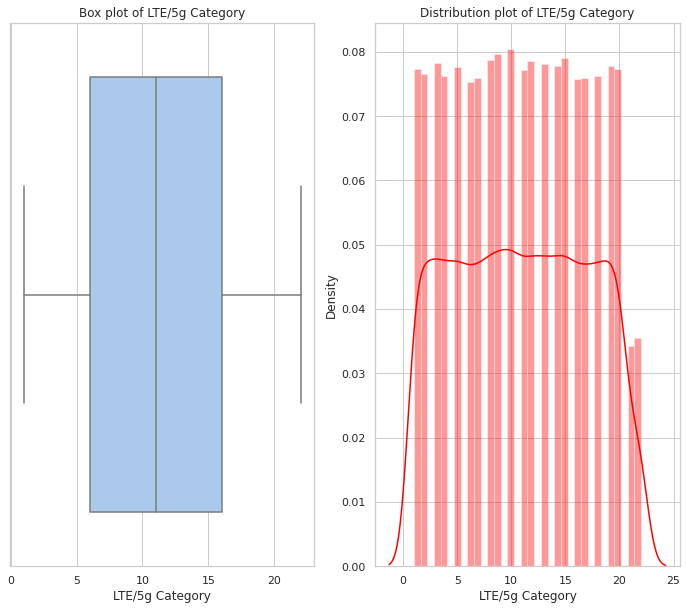

In [16]:
def plotchart(col_name):
    fig, (ax1,ax2) =plt.subplots(1,2,figsize=(12,10))
    sns.boxplot(col_name, orient='h',ax=ax1, color = 'orange',  palette= 'pastel')
    ax1.set_ylabel=col_name.name
    ax1.set_title('Box plot of {}'.format(col_name.name))
    sns.distplot(col_name,ax=ax2, color= 'red') 
    ax2.set_title('Distribution plot of {}'.format(col_name.name))
plotchart(dset['LTE/5g Category'])

In [22]:
X = dset.iloc[:,[4,5,15,3,9,12,14]]
y = dset['slice Type']

# **Splitting of data into training and testing sets**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [26]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25266, 7)
(6317, 7)
(25266,)
(6317,)


# **Training the model on various ML Algorithms**

In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler

In [50]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [51]:
models = []
models.append(('LR',LogisticRegression(solver='liblinear',multi_class='ovr')))
models.append(('LDA',LinearDiscriminantAnalysis(solver='svd')))
models.append(('KNN',KNeighborsClassifier(n_neighbors=10,metric='minkowski')))
models.append(('DT',DecisionTreeClassifier(criterion='gini')))
models.append(('RF',RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=None)))
models.append(('SVM',SVC(C=1.0,kernel='rbf',degree=3,gamma='auto')))
models.append(('BNB',BernoulliNB()))
models.append(('GNB',GaussianNB()))

Name: LR  Mean cross val res: 1.0
Name: LDA  Mean cross val res: 0.7645452392075326
Name: KNN  Mean cross val res: 1.0
Name: DT  Mean cross val res: 1.0
Name: RF  Mean cross val res: 1.0
Name: SVM  Mean cross val res: 1.0
Name: BNB  Mean cross val res: 0.9424522990185803
Name: GNB  Mean cross val res: 0.9424522990185803


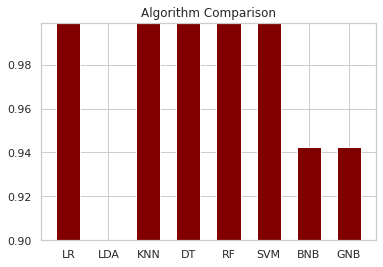

In [52]:
cvresults = []
names = []
res = []
for name, model in models:
    skf = StratifiedKFold(n_splits=10)
    cvres = cross_val_score(model,X_train,y_train,cv=skf,scoring='accuracy')
    cvresults.append(cvres)
    names.append(name)
    res.append(cvres.mean())
    print("Name:",name," Mean cross val res:",cvres.mean())
plt.ylim(.900, .999)
plt.bar(names, res, color ='maroon', width = 0.6)

plt.title('Algorithm Comparison')
plt.show()

In [53]:
model = RandomForestClassifier(n_estimators=200,criterion='gini',max_depth=None)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

1.0

In [54]:
confusion_matrix(y_test,y_pred)

array([[3380,    0,    0],
       [   0, 1494,    0],
       [   0,    0, 1443]])

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      3380
           2       1.00      1.00      1.00      1494
           3       1.00      1.00      1.00      1443

    accuracy                           1.00      6317
   macro avg       1.00      1.00      1.00      6317
weighted avg       1.00      1.00      1.00      6317



# **Testing on New data**

In [40]:
new_data = pd.read_csv('/content/test_dataset.csv')
new_data

,LTE/5g Category,Time,Packet Loss Rate,Packet delay,IoT,LTE/5G,GBR,Non-GBR,AR/VR/Gaming,Healthcare,Industry 4.0,IoT Devices,Public Safety,Smart City & Home,Smart Transportation,Smartphone
0,15,17,0.001000,100,0,1,1,0,1,0,0,0,0,0,0,0
1,14,18,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
2,11,7,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
3,20,14,0.001000,50,1,0,1,0,0,0,1,0,0,0,0,0
4,2,22,0.001000,50,0,1,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31579,9,22,0.000001,10,1,0,0,1,0,0,0,0,0,0,1,0
31580,20,9,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0
31581,8,0,0.000001,10,1,0,0,1,0,0,1,0,0,0,0,0
31582,13,11,0.010000,75,0,1,0,1,0,0,0,0,0,0,0,1


In [43]:
X = new_data.iloc[:,[4,5,15,3,9,12,14]]
preds = model.predict(X)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [47]:
X.iloc[0]

IoT                       0
LTE/5G                    1
Smartphone                0
Packet delay            100
Healthcare                0
Public Safety             0
Smart Transportation      0
Name: 0, dtype: int64

In [48]:
preds[0] #predicted to belong to Slice 1 based on the given usage and delay in packet delivery to destination node

1